In [35]:
#import library
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
#check use GPU or CPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [37]:
#load data
val_path="fruit-and-vegetable-classification/validation"
train_path="fruit-and-vegetable-classification/train"
test_path="fruit-and-vegetable-classification/test"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)

Found 3581 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [38]:
class_names = train_dataset.class_names
print(len(class_names))
print(class_names)

36
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [39]:
#model build
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_names),activation='softmax'))


In [40]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                      

c:\Users\antoa\AppData\Local\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [41]:
#train model
callbacks = [tf.keras.callbacks.EarlyStopping( monitor='val_accuracy', patience=5)]
history = model.fit(x=train_dataset,
                    epochs= 50,
                    callbacks=callbacks,
                    validation_data=val_dataset)

Epoch 1/50
112/112 [==============================] - 28s 234ms/step - loss: 3.1961 - accuracy: 0.1486 - val_loss: 3.3618 - val_accuracy: 0.1681
Epoch 2/50
112/112 [==============================] - 27s 229ms/step - loss: 2.3866 - accuracy: 0.3022 - val_loss: 1.7831 - val_accuracy: 0.4444
Epoch 3/50
112/112 [==============================] - 28s 234ms/step - loss: 2.0592 - accuracy: 0.4083 - val_loss: 1.1704 - val_accuracy: 0.6667
Epoch 4/50
112/112 [==============================] - 28s 236ms/step - loss: 1.7795 - accuracy: 0.4722 - val_loss: 0.7400 - val_accuracy: 0.7749
Epoch 5/50
112/112 [==============================] - 28s 239ms/step - loss: 1.5366 - accuracy: 0.5387 - val_loss: 0.7912 - val_accuracy: 0.7578
Epoch 6/50
112/112 [==============================] - 28s 241ms/step - loss: 1.3464 - accuracy: 0.5948 - val_loss: 0.7026 - val_accuracy: 0.7806
Epoch 7/50
112/112 [==============================] - 29s 243ms/step - loss: 1.1774 - accuracy: 0.6495 - val_loss: 0.5935 - val_ac

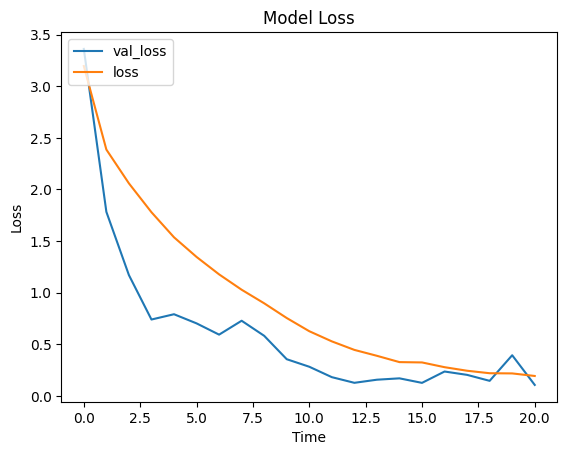

In [42]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

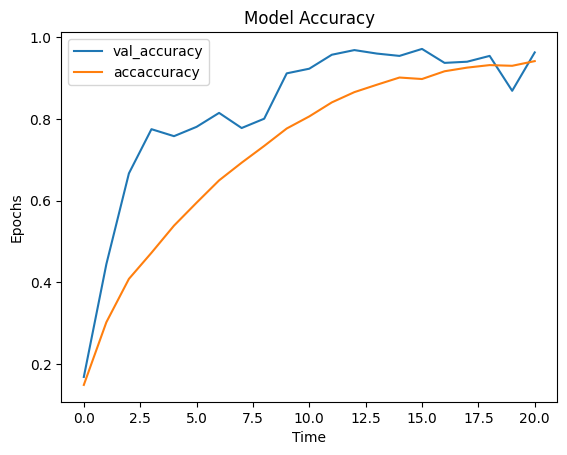

In [48]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'accaccuracy'], loc='upper left')
plt.show()

In [44]:
model.save('Fruit_and_vegetable_classification.h5')